In [1]:
from sklearn.datasets import make_blobs, make_classification, make_circles
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, Birch, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seed for reproducibility. interesting seeds 999, 99, 98, 9
seed = 420 + 69

# Generate the blobs dataset
X_blobs, y_blobs = make_blobs(n_samples = 1000, n_features = 2, random_state = seed)

# Generate the classification dataset
X_classification, y_classification = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0, n_clusters_per_class = 1, random_state = seed)

#  Generate the circles dataset
X_circles, y_circles = make_circles(n_samples = 1000, noise = 0.3, random_state = seed)


In [3]:
# Algorithms dict. The keys are the names of the algorithms and the values are the algorithms themselves
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state = seed),
    'Affinity Propagation': AffinityPropagation(),
    'DBSCAN': DBSCAN(),
    'Gaussian Mixture Model': GaussianMixture(n_components=3 ,random_state = seed),
    'BIRCH': Birch(),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'Mean Shift': MeanShift()
}

# Datasets dict
datasets = {
    'Blobs': X_blobs,
    'Classification': X_classification,
    'Circles': X_circles
}

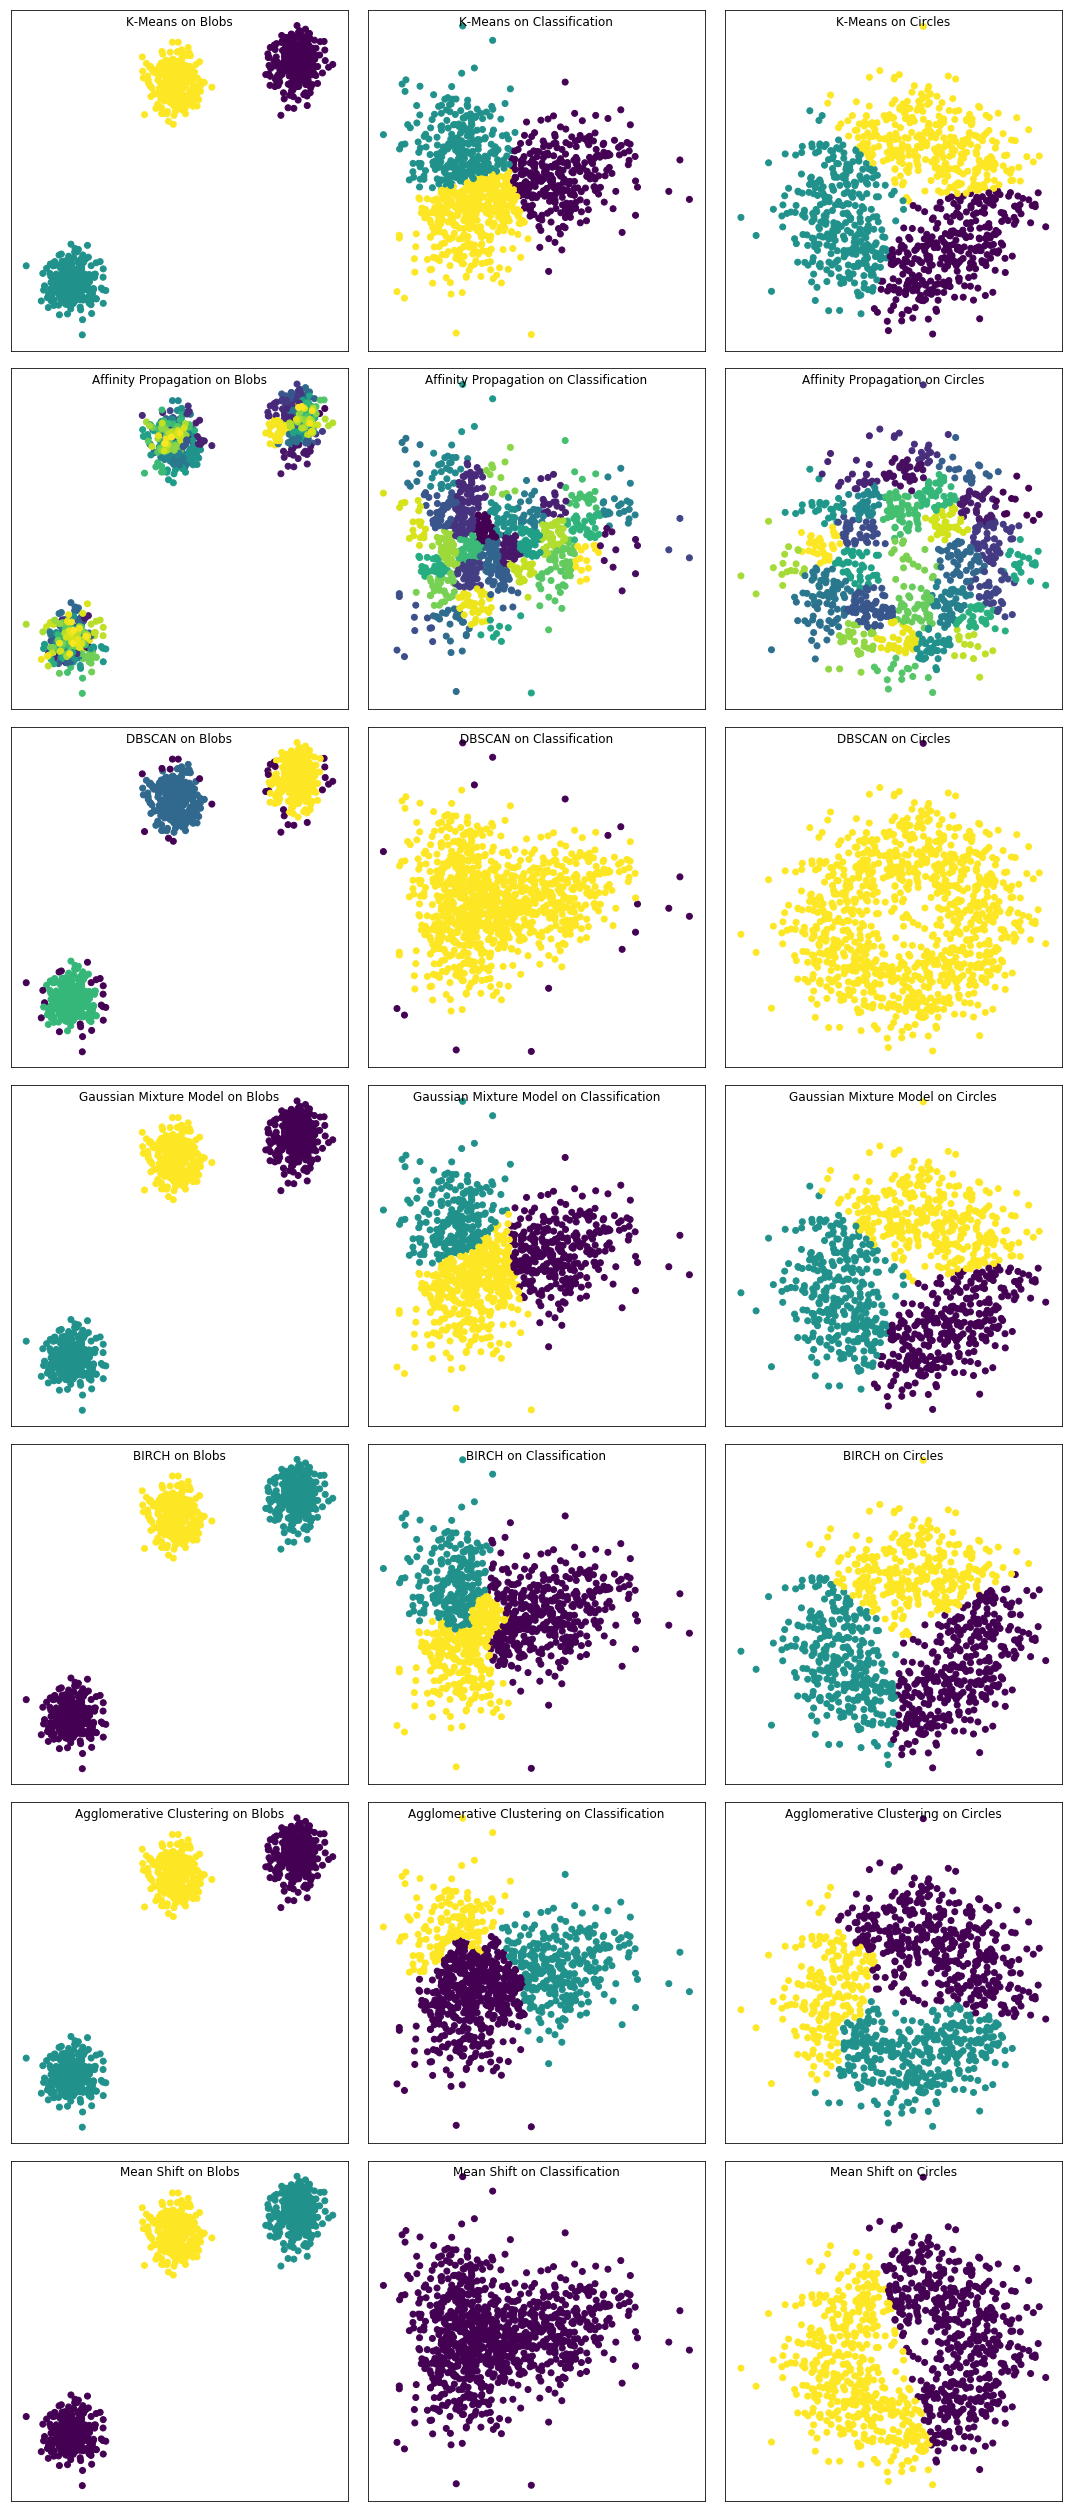

In [4]:
# Plot the results
fig, axes = plt.subplots(len(clustering_algorithms), len(datasets), figsize=(15, 35))

# Loop through the algorithms
for i, (alg_name, algorithm) in enumerate(clustering_algorithms.items()):
    # Loop through the datasets, fit the algorithm, and plot the results
    for j, (dataset_name, X) in enumerate(datasets.items()):
        y_pred = algorithm.fit_predict(X)
        
        # Plot the results colored by the predicted labels
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
        axes[i, j].set_title(f'{alg_name} on {dataset_name}', pad=-15)
        axes[i, j].set_xticks(())
        axes[i, j].set_yticks(())

plt.tight_layout()
plt.show()
